In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm

%run ../Scripts/analysisMethods.py
%run ../Scripts/supMethods.py
%run ../Scripts/entropy.py
%run ../Scripts/trajectory.py
foldername = "../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed0"

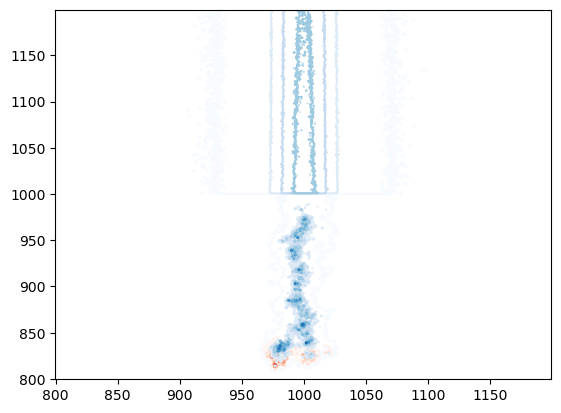

In [14]:
t_dom= get_tdomain(foldername, (-0.35, -0.35))
params, sim_params = read_json(foldername)

In [15]:
%run ../Scripts/fitness.py
%run ../Scripts/mutation.py

In [51]:
entropy_change_time = []
entropy_change_mutation_time = []
entropy_change_growth_time = []
entropy_change_remainder_time = []
t_range = []
n_old, nh_old, f_old = load_outputs(foldername, t_dom[0], True)

for t in t_dom[800:]:
    n_new, nh_new, f_new = load_outputs(foldername, t, True)
    f_norm = norm_fitness(f_new, n_old, params, sim_params)
    n_intermediate = virus_growth(n_old, f_new, params, sim_params)
    n_mutated = mutation(n_intermediate, params, sim_params)

    entropy_change_growth = compute_entropy_change(n_intermediate, n_old)
    entropy_change_remainder = compute_entropy_change(n_new, n_intermediate)
    # entropy_change_mutation = compute_entropy_production_2D_mutation(n_intermediate, params, sim_params)
    entropy_change_mutation = compute_entropy_change(n_mutated, n_intermediate)
    entropy_change = compute_entropy_change(n_new, n_old)

    entropy_change_time.append(entropy_change)
    entropy_change_mutation_time.append(entropy_change_mutation)
    entropy_change_growth_time.append(entropy_change_growth)
    entropy_change_remainder_time.append(entropy_change_remainder)
    t_range.append(t)
    n_old = n_new


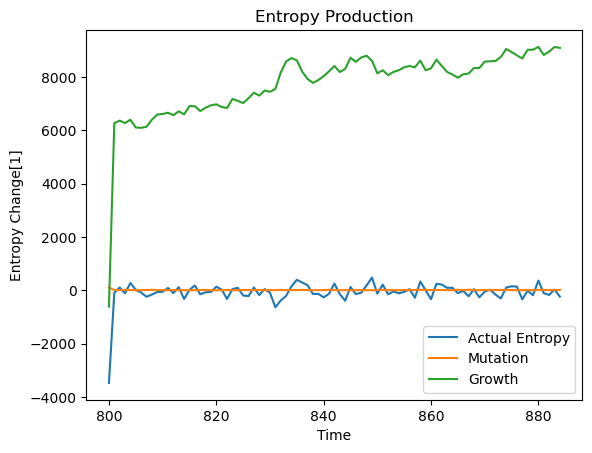

In [52]:
plt.figure()
plt.plot(t_range, entropy_change_time, label = "Actual Entropy")
plt.plot(t_range, entropy_change_mutation_time, label = "Mutation")
plt.plot(t_range, np.array(entropy_change_growth_time), label = "Growth")
plt.title("Entropy Production")
plt.ylabel("Entropy Change[1]")
plt.xlabel("Time")
plt.legend()

In [71]:
foldernames = []
list_to_sweep = [0.0125, 0.025, 0.05, 0.1, 0.2]
seed_list = [0, 1, 2, 3]

for i in list_to_sweep:
    foldernames.append(f"../Data_HGT_rate_type0_Set_2/HGT_rate_{i}_seed{1}")

foldernames

['../Data_HGT_rate_type0_Set_2/HGT_rate_0.0125_seed1',
 '../Data_HGT_rate_type0_Set_2/HGT_rate_0.025_seed1',
 '../Data_HGT_rate_type0_Set_2/HGT_rate_0.05_seed1',
 '../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed1',
 '../Data_HGT_rate_type0_Set_2/HGT_rate_0.2_seed1']

In [82]:
%run ../Scripts/plotVelocity.py

../Data_HGT_rate_type0_Set_2/HGT_rate_0.0125_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.025_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.05_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.2_seed1


/home/zhi/Documents/Code/CRISPR_Sim/Scripts/formulas.py:55: RuntimeWarning: invalid value encountered in power
  v = np.power(s, 1/3)*np.power(D, 2/3)*np.power(common_log, 1/3)
/home/zhi/Documents/Code/CRISPR_Sim/Scripts/formulas.py:94: RuntimeWarning: invalid value encountered in power
  uc = (1/4)*np.power(D/s, 1/3)*(np.power(common_log, 2/3))


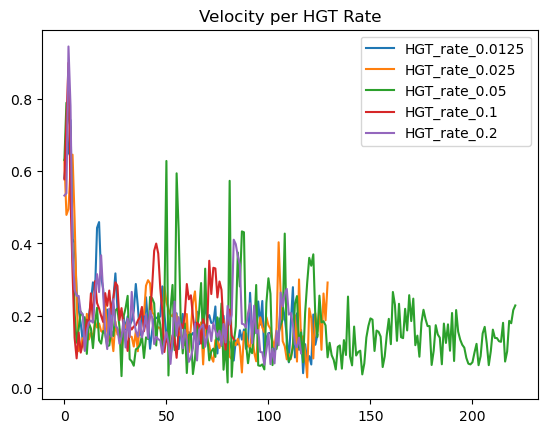

In [73]:
velocity_HGT_rate = []
velocity_var_HGT_rate = []
plt.figure()
plt.title("Velocity per HGT Rate")
for i, folder in enumerate(foldernames):
    print(folder)
    t_dom = get_tdomain(folder, False)
    params, sim_params = read_json(folder)
    init_list = []
    tree_index = 0
    tree_path = folder + f"/trajs_trees/tree{tree_index}.json"
    while(os.path.isfile(tree_path)):
        # print("tree loaded:", tree_index)
        init_list.append(TreeNode.load_tree(tree_path))
        tree_index += 1
        tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"
    
    v_obs, _, _ = plot_velocity_single(init_list, params, sim_params)
    rate = list_to_sweep[i]
    plt.plot(v_obs, label = f"HGT_rate_{rate}")

    velocity_HGT_rate.append(np.mean(v_obs))
    velocity_var_HGT_rate.append(np.sqrt(np.var(v_obs)))

plt.legend()

Text(0.5, 0, 'HGT_rate')

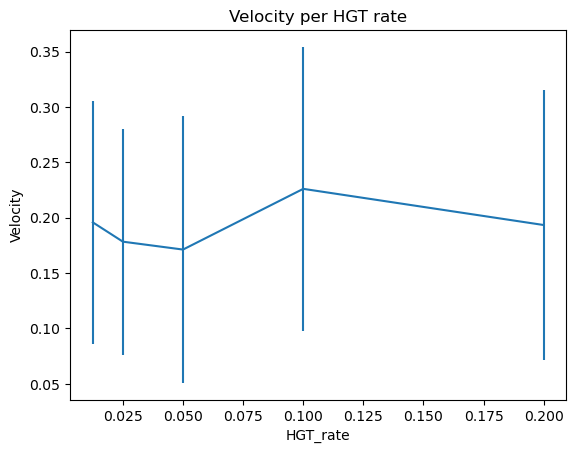

In [74]:
plt.errorbar(list_to_sweep, velocity_HGT_rate, yerr = velocity_var_HGT_rate)
plt.title("Velocity per HGT rate")
plt.ylabel("Velocity")
plt.xlabel("HGT_rate")

../Data_HGT_rate_type0_Set_2/HGT_rate_0.0125_seed0
../Data_HGT_rate_type0_Set_2/HGT_rate_0.025_seed0
../Data_HGT_rate_type0_Set_2/HGT_rate_0.05_seed0
../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed0
../Data_HGT_rate_type0_Set_2/HGT_rate_0.2_seed0
../Data_HGT_rate_type0_Set_2/HGT_rate_0.0125_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.025_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.05_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.2_seed1
../Data_HGT_rate_type0_Set_2/HGT_rate_0.0125_seed2
../Data_HGT_rate_type0_Set_2/HGT_rate_0.025_seed2
../Data_HGT_rate_type0_Set_2/HGT_rate_0.05_seed2
../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed2
../Data_HGT_rate_type0_Set_2/HGT_rate_0.2_seed2
../Data_HGT_rate_type0_Set_2/HGT_rate_0.0125_seed3
../Data_HGT_rate_type0_Set_2/HGT_rate_0.025_seed3
../Data_HGT_rate_type0_Set_2/HGT_rate_0.05_seed3
../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed3
../Data_HGT_rate_type0_Set_2/HGT_rate_0.2_seed3


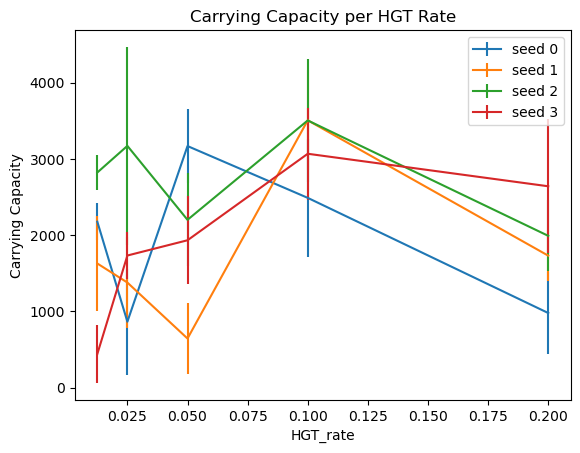

In [92]:

plt.figure()
plt.title("Carrying Capacity per HGT Rate")
for seed in seed_list:
    foldernames = []
    for i in list_to_sweep:
        foldernames.append(f"../Data_HGT_rate_type0_Set_2/HGT_rate_{i}_seed{seed}")
    
    count_HGT_rate = []
    count_var_rate = []
    for i, folder in enumerate(foldernames):
        print(folder)
        t_dom = get_tdomain(folder, False)
        params, sim_params = read_json(folder)
        init_list = []
        tree_index = 0
        tree_path = folder + f"/trajs_trees/tree{tree_index}.json"
        while(os.path.isfile(tree_path)):
            # print("tree loaded:", tree_index)
            init_list.append(TreeNode.load_tree(tree_path))
            tree_index += 1
            tree_path = foldername + f"/trajs_trees/tree{tree_index}.json"

        count_obs, count_var = get_count_single(init_list, params, sim_params, 10)
        rate = list_to_sweep[i]
        # plt.plot(count_obs, label = f"HGT_rate_{rate}")

        count_HGT_rate.append(count_obs)
        count_var_rate.append(np.sqrt(count_var))

    plt.errorbar(list_to_sweep, count_HGT_rate, yerr = count_var_rate, label = f"seed {seed}") 
plt.ylabel("Carrying Capacity")
plt.xlabel("HGT_rate")
plt.legend()

Text(0.5, 0, 'Time [t*10]')

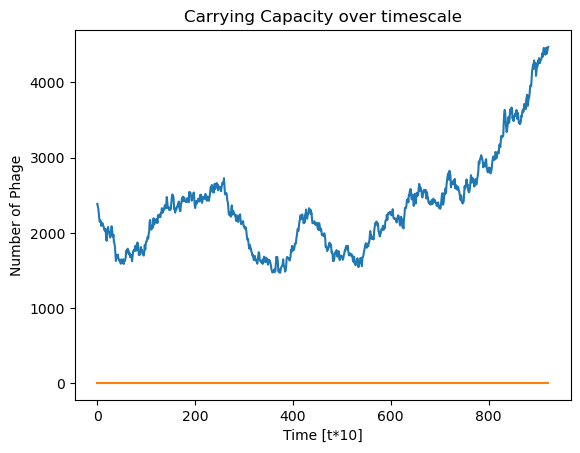

In [98]:
count_time = []
spacer_time = []

for t in t_dom:
    n, nh, f = load_outputs(foldername, t, True)
    params, sim_params = read_json(foldername)
    Nh = params["Nh"]
    count_time.append(np.sum(n))
    spacer_time.append(np.sum(nh)/Nh)

plt.plot(count_time)
plt.plot(spacer_time)
plt.title("Carrying Capacity over timescale")
plt.ylabel("Number of Phage")
plt.xlabel("Time [t]")

In [102]:
(params["Nh"]*params["M"] + params["N0"])/params["Nh"]

5.0002386

In [101]:
params

{'Nh': 10000000.0,
 'N0': 2386,
 'R0': 20,
 'M': 5,
 'mu': 0.1,
 'gamma_shape': 20,
 'Np': 0,
 'dc': 3,
 'h': 4,
 'r': 2000,
 'beta': 0,
 'rate_HGT': 0.1,
 'HGT_bonus_acq_ratio': 1,
 'rate_recovery': 0.1,
 'HGT_type': 0,
 'N': 2386,
 'D': 0.10500000000000001,
 's': 0.002051410507565201,
 'tau': 20955.574182732606,
 'v0': 0.11632631846703498,
 'sigma': 7.530307378466702,
 'uc': 15.705584405265776,
 'M0': 5}

Text(0.5, 0, 'Time [t]')

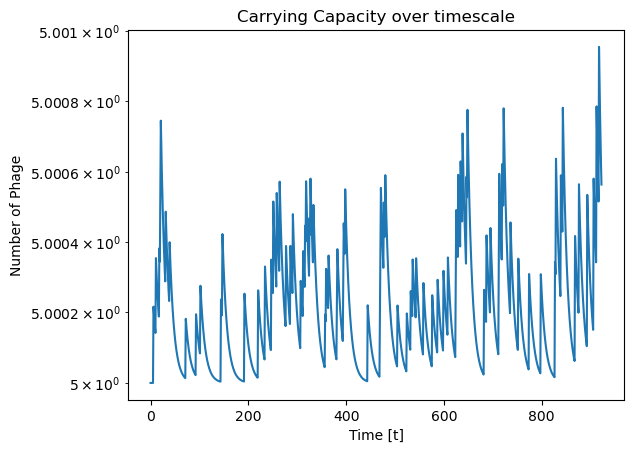

In [100]:
# plt.plot(count_time)
plt.plot(spacer_time)
plt.yscale("log")
plt.title("Carrying Capacity over timescale")
plt.ylabel("Number of Phage")
plt.xlabel("Time [t]")


In [104]:
%run ../Scripts/initMethods.py

In [122]:
params["Nh"] = 10**5
params["mu"] = 1000

In [123]:
init_cond(params, sim_params)

({'Nh': 100000,
  'N0': 15428,
  'R0': 20,
  'M': 5,
  'mu': 1000,
  'gamma_shape': 20,
  'Np': 0,
  'dc': 3,
  'h': 4,
  'r': 2000,
  'beta': 0,
  'rate_HGT': 0.1,
  'HGT_bonus_acq_ratio': 1,
  'rate_recovery': 0.1,
  'HGT_type': 0,
  'N': 15428,
  'D': 1050.0,
  's': 0.002051410507565201,
  'tau': 32.40860772621208,
  'v0': 75.20684393942022,
  'sigma': 191.47073044390623,
  'uc': 656.4669429330074,
  'M0': 5},
 {'continue': False,
  'xdomain': 1000,
  'dx': 1,
  'tf': 4000,
  'dt': 1,
  'dt_exact_fitness': 1,
  'dt_snapshot': 1,
  'initial_mean_n': [0, 0],
  'initial_mean_nh': [0, 0],
  'conv_size': 4000,
  'num_threads': 4,
  'foldername': '../Data_HGT_rate_type0_Set_2/HGT_rate_0.1_seed0',
  'seed': 103,
  'initial_var_n': 191.47073044390623,
  'initial_var_nh': 683.82006974096,
  'time_next_event': 8.231784262767292})